In [1]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib

In [9]:
# Read your point shapefiles (Flooded and Non Flooded locations)
points=gpd.read_file('./input/all_titik_malang.shp')

print(points)

           ID                    geometry
0        None  POINT (112.59107 -7.94296)
1        None  POINT (112.59099 -7.94296)
2        None  POINT (112.59062 -7.94296)
3        None  POINT (112.59054 -7.94296)
4        None  POINT (112.59077 -7.94296)
...       ...                         ...
1619232  None  POINT (112.59114 -7.94296)
1619233  None  POINT (112.59137 -7.94296)
1619234  None  POINT (112.59129 -7.94296)
1619235  None  POINT (112.59092 -7.94296)
1619236  None  POINT (112.59084 -7.94296)

[1619237 rows x 2 columns]


In [10]:
# make columns to extract the values of each predictive feature
# for each point. 
points['DEM']=0 #
points['Slope']=0
points['Aspect']=0
points['Curvature']=0
points['TWI']=0
points['DTDrainage']=0
points['DTRoad']=0
points['DTRiver']=0
#points['CN']=0
#points['AP']=0  #Max daily precipitation
#points['FP']=0  #Frequency of extreme precipitation event.

In [11]:
#The predictive features are in raster format so we use rasterio package to 
#read them and convert them to numpy array

DEM_raster=rio.open('./input/DEM_KotaMalang.tif')
DEM_arr=DEM_raster.read(1)

Slope_raster=rio.open('./input/Slope(degrees)_test.tif')
Slope_arr=Slope_raster.read(1)

Aspect_raster=rio.open('./input/Aspect_test.tif')
Aspect_arr=Aspect_raster.read(1)

Curvature_raster=rio.open('./input/Curvature_test.tif')
Curvature_arr=Curvature_raster.read(1)

TWI_raster=rio.open('./input/TWI1.tif')
TWI_arr=TWI_raster.read(1)

DTRoad_raster=rio.open('./input/Road_test.tif')
DTRoad_arr=DTRoad_raster.read(1)

DTRiver_raster=rio.open('./input/River_test.tif')
DTRiver_arr=DTRiver_raster.read(1)

DTDrainage_raster=rio.open('./input/Irrigation_test.tif')
DTDrainage_arr=DTDrainage_raster.read(1)

#CN_raster=rio.open('./Input/GCN250m_test.tif')
#CN_arr=CN_raster.read(1)

#AP_raster=rio.open('AP.tif')
#AP_arr=AP.read(1)

#FP_raster=rio.open('FP.tif')
#FP_arr=FP.read(1)

<Axes: >

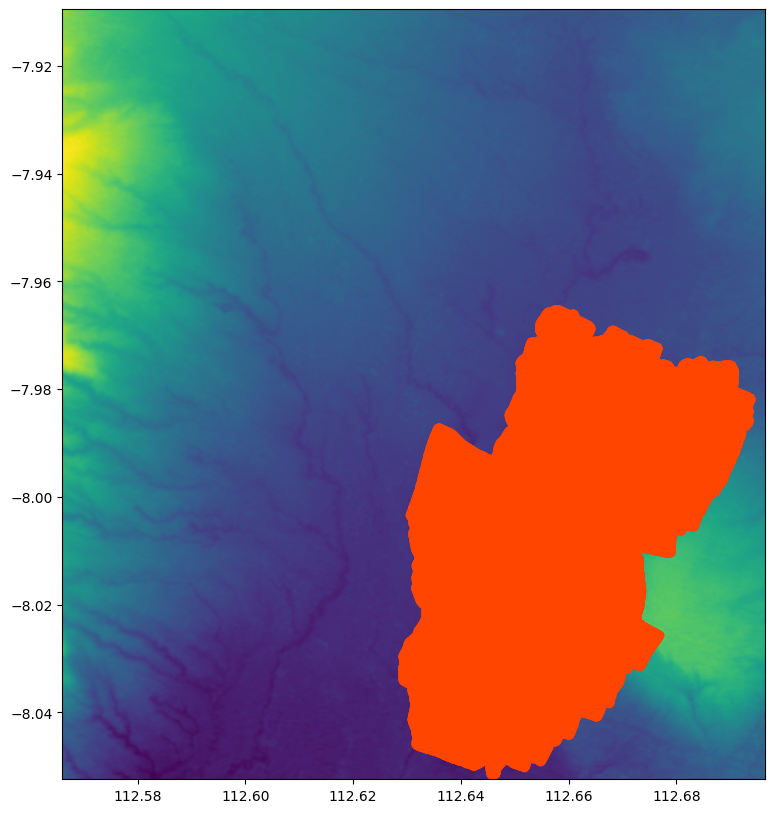

In [5]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(10,10))
points.plot(aspect=1, ax=ax, color='orangered')
show(DEM_raster, ax=ax)

In [12]:
# Extracting the raster values to the points shapefile
count=0
for index,row in points.iterrows(): #iterate over the points in the shapefile
    longitude=row['geometry'].x #get the longitude of the point
    latitude=row['geometry'].y  #get the latitude of the point

    #print(latitude)
    #print("Longitude="+str(longitude))
    #print(count)
    #count +=1

    rowIndex, colIndex=DEM_raster.index(longitude,latitude) # the corresponding pixel to the point (longitude,latitude)

    #print(rowIndex)

    # Extract the raster values at the point location

    points.loc[index,'DEM']=DEM_arr[rowIndex, colIndex]
    #points['Slope'].loc[index]=Slope_arr[rowIndex, colIndex] Before edit
    points.loc[index,'Slope']=Slope_arr[rowIndex, colIndex]
    #points['Aspect'].loc[index]=Aspect_arr[rowIndex, colIndex] Before edit
    points.loc[index,'Aspect']=Aspect_arr[rowIndex, colIndex]
    #points['Curvature'].loc[index]=Curvature_arr[rowIndex, colIndex] Before edit
    points.loc[index,'Curvature']=Curvature_arr[rowIndex, colIndex]
    #points['TWI'].loc[index]=TWI_arr[rowIndex, colIndex] Before edit
    points.loc[index,'TWI']=TWI_arr[rowIndex, colIndex]
    #points['DTRoad'].loc[index]=DTRoad_arr[rowIndex, colIndex] Before edit
    points.loc[index,'DTRoad']=DTRoad_arr[rowIndex, colIndex]
    #points['DTRiver'].loc[index]=DTRiver_arr[rowIndex, colIndex] Before edit
    points.loc[index,'DTRiver']=DTRiver_arr[rowIndex, colIndex]
    #points['DTDrainage'].loc[index]=DTDrainage_arr[rowIndex, colIndex] Before edit
    points.loc[index,'DTDrainage']=DTDrainage_arr[rowIndex, colIndex]
    #points.loc[index,'CN']=CN_arr[rowIndex, colIndex]
    #points['AP'].loc[index]=AP_arr[rowIndex, colIndex] Before edit
    #points['FP'].loc[index]=FP_arr[rowIndex, colIndex] Before edit

C:\Users\fauzi\AppData\Local\Temp\ipykernel_15696\2287138122.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '550.815185546875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  points.loc[index,'DEM']=DEM_arr[rowIndex, colIndex]
C:\Users\fauzi\AppData\Local\Temp\ipykernel_15696\2287138122.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.145565986633301' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  points.loc[index,'Slope']=Slope_arr[rowIndex, colIndex]
C:\Users\fauzi\AppData\Local\Temp\ipykernel_15696\2287138122.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '103.17877197265625' has dtype incompatible with int64, please explicitly cast to a com

In [11]:
points.head() # to have a look on the calculated fields.

,ID,geometry,DEM,Slope,Aspect,Curvature,TWI,DTDrainage,DTRoad,DTRiver
0,1,POINT (112.62904 -7.95811),467.591888,4.568839,188.306152,-45791620.0,-6.194138,0.000356,8.560515,2.984402
1,1,POINT (112.63714 -7.94656),462.841400,4.455830,193.154373,-70482864.0,-6.186684,0.000572,10.597574,4.046704
2,1,POINT (112.64078 -7.94497),466.124420,0.507141,308.309296,-115260144.0,-5.022724,0.023873,15.850603,17.131851
3,1,POINT (112.64111 -7.94467),467.400452,4.072413,244.759323,-47787752.0,-6.162006,0.016472,8.881338,18.878628
4,1,POINT (112.63872 -7.94833),460.466583,0.914219,19.733192,31455296.0,-5.492535,0.001439,11.911927,14.849480


In [7]:
# Save the points file
#points.to_file('./Input/points_data_new.shp') # save as a shapfile
points.to_file('./input/studyarea_kedungkandang.shp') # save as a shapfile  

In [13]:
# or
points.to_pickle('./input/all_studyarea.pkl') # save as a pickle.